In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


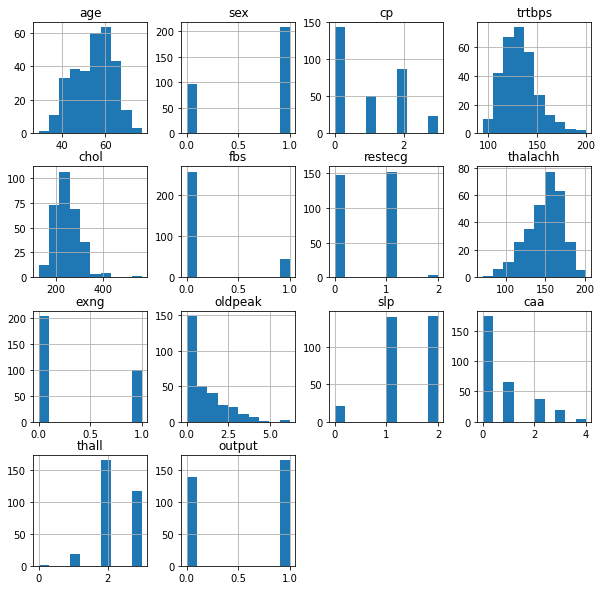

In [3]:
data.hist(figsize=(10, 10))
plt.show()

In [4]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [5]:
X = np.array(data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']])
X[0:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [6]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X[0:5]

array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
         2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
        -2.27457861, -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, -0.09273778,  0.07219949,
        -0.41763453,  0.89896224,  1.63347147, -0.69663055,  2.12257273,
        -2.27457861, -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, -0.09273778, -0.81677269,
        -0.41763453, -1.00583187,  0.97751389, -0.69663055,  0.31091206,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.18017482,  0.68100522,  0.03203122, -0.66386682, -0.19835726,
        -0.41763453,  0.89896224,  1.23989692, -0.69663055, -0.20670527,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.29046364, -1.46841752, -0.93851463, -0.66386682,  2.08204965,
        -0.41763453,  0.89896224,  0.58393935,  1.43548113, -0.37924438,
         0.97635214, -0.71442887, -0.51292188]])

In [7]:
y = np.array(data['output'])
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- ### KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

max_k = 10
knn_accuracies = []
for i in range(1, max_k):
       nei = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
       y_test_ = nei.predict(X_test)
       score = accuracy_score(y_true=y_test, y_pred=y_test_)
       knn_accuracies.append(score)
print(knn_accuracies)

[0.8524590163934426, 0.819672131147541, 0.8688524590163934, 0.8852459016393442, 0.9180327868852459, 0.9344262295081968, 0.9180327868852459, 0.8524590163934426, 0.8852459016393442]


maximum accuracy is: 0.9344262295081968
max accuracy k is: 6


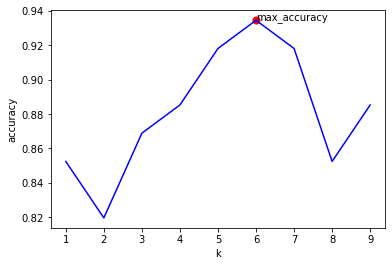

In [10]:
max_accuracy = max(knn_accuracies)
max_accuracy_index = knn_accuracies.index(max_accuracy)
print("maximum accuracy is:", max_accuracy)
print("max accuracy k is:", max_accuracy_index + 1)
plt.plot(np.arange(1, max_k), knn_accuracies, color='b')
plt.scatter(max_accuracy_index + 1, max_accuracy, color='r', s=50)
plt.text(max_accuracy_index + 1, max_accuracy, "max_accuracy")
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

- ### Decision Trees

In [11]:
from sklearn.tree import DecisionTreeClassifier
max_depth = 11
dcsn_tree_scores = []
dcsn_tree_accuracies = []

for i in range(1, max_depth):
       dcsn_tree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
       dcsn_tree.fit(X_train, y_train)
       dcsn_tree_score = dcsn_tree.score(X_train, y_train)
       dcsn_tree_scores.append(dcsn_tree_score)
       y_test_ = dcsn_tree.predict(X_test)
       dcsn_tree_accuracy = accuracy_score(y_true=y_test, y_pred=y_test_)
       dcsn_tree_accuracies.append(dcsn_tree_accuracy)
print("train set scores:")
print(dcsn_tree_scores)
print("predict accuracy scores:")
print(dcsn_tree_accuracies)
max_accuracy = max(dcsn_tree_accuracies)
max_accuracy_depth = dcsn_tree_accuracies.index(max_accuracy) + 1

train set scores:
[0.7396694214876033, 0.78099173553719, 0.8471074380165289, 0.8553719008264463, 0.8966942148760331, 0.9380165289256198, 0.9710743801652892, 0.9917355371900827, 1.0, 1.0]
predict accuracy scores:
[0.8360655737704918, 0.7868852459016393, 0.819672131147541, 0.8852459016393442, 0.819672131147541, 0.8852459016393442, 0.7868852459016393, 0.8360655737704918, 0.8360655737704918, 0.819672131147541]


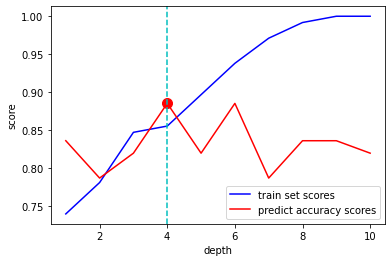

In [12]:
plot_dcsn_tree_scores = plt.plot(np.arange(1, max_depth), dcsn_tree_scores, color='b', label= 'train set scores')
plot_dcsn_tree_accuracies = plt.plot(np.arange(1, max_depth), dcsn_tree_accuracies, color='r', label= 'predict accuracy scores')
plt.scatter(max_accuracy_depth, max_accuracy, color='red', s=100)
plt.axvline(max_accuracy_depth, linestyle= 'dashed', color='c')
plt.legend()
plt.xlabel('depth')
plt.ylabel('score')
plt.show()

In [13]:
print('accuracy for selected depth:', max_accuracy, '|selected depth:', max_accuracy_depth)

accuracy for selected depth: 0.8852459016393442 |selected depth: 4


[]

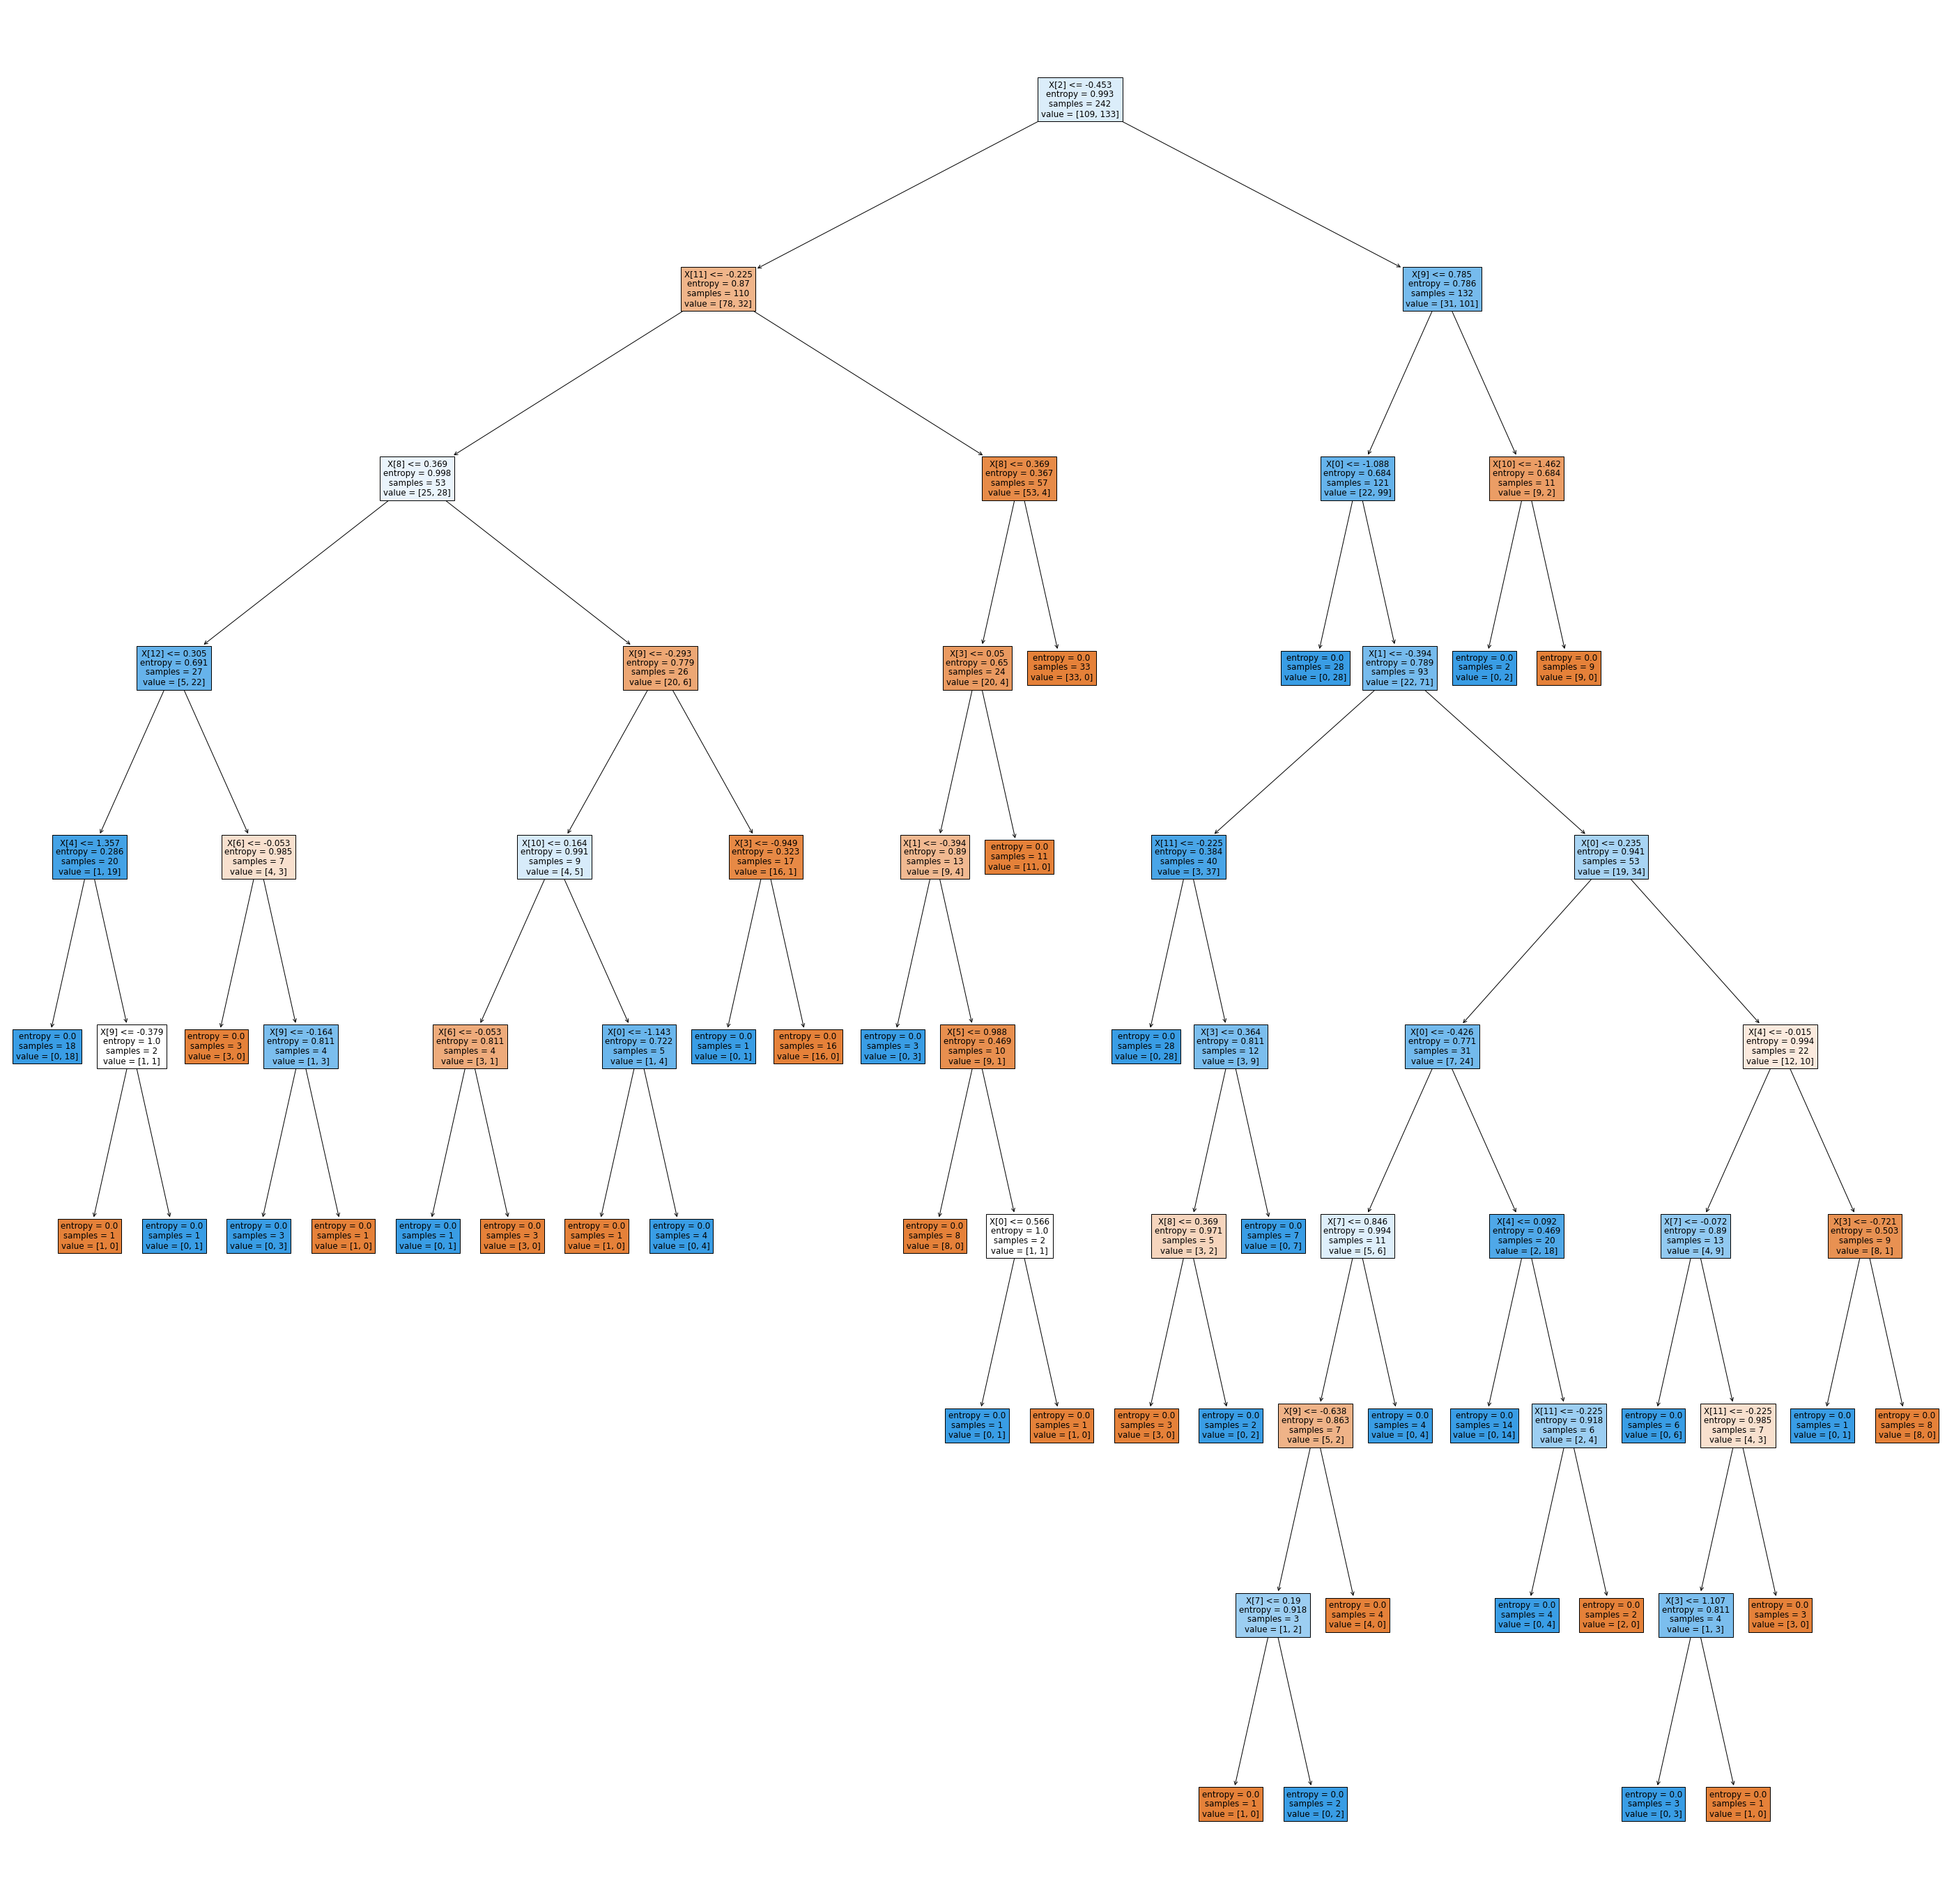

In [14]:
from sklearn import tree
fig = plt.figure(figsize=(50, 50))
tree.plot_tree(dcsn_tree, filled=True)
plt.plot()

- ### Logistics Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 10, 100, 1000],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
lr = LogisticRegression()
clf = GridSearchCV(lr, param_grid)
clf.fit(X_train, y_train)
print("best parameters:", clf.best_params_)
print("best score:", clf.best_score_)

best parameters: {'C': 1, 'solver': 'liblinear'}
best score: 0.8180272108843537


In [16]:
y_test_ = clf.predict(X_test)
y_test_prob = clf.predict_proba(X_test)
print(y_test_prob[0:5])

[[0.92094248 0.07905752]
 [0.34328706 0.65671294]
 [0.15330632 0.84669368]
 [0.97813133 0.02186867]
 [0.0393986  0.9606014 ]]


In [17]:
from sklearn.metrics import jaccard_score

print("jaccard_scor 1:", jaccard_score(y_true=y_test, y_pred=y_test_, pos_label=1))
print("jaccard_scor 0:", jaccard_score(y_true=y_test, y_pred=y_test_, pos_label=0))

jaccard_scor 1: 0.75
jaccard_scor 0: 0.7352941176470589


C:\ProgramData\Anaconda3\envs\condaenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


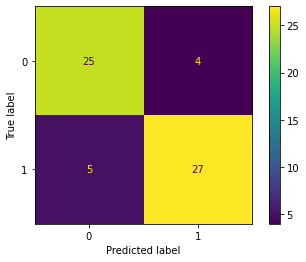

In [18]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)